In [2]:
import os
import json
from pathlib import Path
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('./model_recovery_fit_df.csv')
df.head()

,Unnamed: 0,lightcurve,true_model,lightcurve_path,true_params,true_lightcurve,fit_model,fit_path,t_max,residual,best_fit_params,best_fit_lightcurve
0,0,Bu2019lm_00000,Bu2019lm,./characteristic_injections/lc_Bu2019lm_00000....,"{'simulation_id': 0, 'luminosity_distance': 7....","{'sample_times': {0: 0.1, 1: 0.6, 2: 1.1, 3: 1...",Bu2019lm,./model_recovery_timestep/lc_Bu2019lm_00000/Bu...,3.0,8.050780,"{'luminosity_distance': 6.514705615072107, 'KN...","{'ztfg': {0: 16.737290695454522, 1: 13.1219203..."
1,1,Bu2019lm_00000,Bu2019lm,./characteristic_injections/lc_Bu2019lm_00000....,"{'simulation_id': 0, 'luminosity_distance': 7....","{'sample_times': {0: 0.1, 1: 0.6, 2: 1.1, 3: 1...",Piro2021,./model_recovery_timestep/lc_Bu2019lm_00000/Pi...,3.0,27.369321,"{'luminosity_distance': 35.88141540386808, 'ti...","{'ztfg': {0: 15.733386209898928, 1: 13.8184316..."
2,2,Bu2019lm_00000,Bu2019lm,./characteristic_injections/lc_Bu2019lm_00000....,"{'simulation_id': 0, 'luminosity_distance': 7....","{'sample_times': {0: 0.1, 1: 0.6, 2: 1.1, 3: 1...",TrPi2018,./model_recovery_timestep/lc_Bu2019lm_00000/Tr...,3.0,97.539924,"{'luminosity_distance': 170.0587546147348, 'ti...","{'ztfg': {0: 13.026401980070524, 1: 12.5698337..."
3,3,Bu2019lm_00000,Bu2019lm,./characteristic_injections/lc_Bu2019lm_00000....,"{'simulation_id': 0, 'luminosity_distance': 7....","{'sample_times': {0: 0.1, 1: 0.6, 2: 1.1, 3: 1...",nugent-hyper,./model_recovery_timestep/lc_Bu2019lm_00000/nu...,3.0,33.216187,"{'luminosity_distance': 170.6897604563875, 'ti...","{'ztfg': {0: 16.763679988978737, 1: 14.8183018..."
4,4,Bu2019lm_00000,Bu2019lm,./characteristic_injections/lc_Bu2019lm_00000....,"{'simulation_id': 0, 'luminosity_distance': 7....","{'sample_times': {0: 0.1, 1: 0.6, 2: 1.1, 3: 1...",Bu2019lm,./model_recovery_timestep/lc_Bu2019lm_00000/Bu...,4.0,10.168329,"{'luminosity_distance': 5.03681939346171, 'KNp...","{'ztfg': {0: 16.22114891558217, 1: 12.92754438..."


In [4]:
lightcurves = df['lightcurve'].unique()

In [14]:
true_model = []
for lightcurve in lightcurves:
    ## include the indices of the rows in df that have the same lightcurve name
    sub_df = df[df['lightcurve'] == lightcurve]
    ## find row in sub_df with lowest residual value and append a tuple of the (true_model, fit_model) to the true_model list
    lowest_residual_row = sub_df[sub_df['residual'] == sub_df['residual'].min()]
    true_model.append((lowest_residual_row['lightcurve'].values[0], lowest_residual_row['true_model'].values[0], lowest_residual_row['fit_model'].values[0], lowest_residual_row['Unnamed: 0'].values[0]))
    
true_model

[('Bu2019lm_00000', 'Bu2019lm', 'Bu2019lm', 20),
 ('Piro2021_00000', 'Piro2021', 'nugent-hyper', 35),
 ('TrPi2018_00000', 'TrPi2018', 'TrPi2018', 94),
 ('nugent-hyper_00000', 'nugent-hyper', 'Piro2021', 125)]

In [15]:
mismatched_models = []
for item in true_model:
    if item[1] != item[2]:
        mismatched_models.append(item)
mismatched_models

[('Piro2021_00000', 'Piro2021', 'nugent-hyper', 35),
 ('nugent-hyper_00000', 'nugent-hyper', 'Piro2021', 125)]

In [16]:
mm_df = pd.DataFrame(mismatched_models, columns=['lightcurve', 'true_model', 'fit_model', 'index'])
mm_df.head()

,lightcurve,true_model,fit_model,index
0,Piro2021_00000,Piro2021,nugent-hyper,35
1,nugent-hyper_00000,nugent-hyper,Piro2021,125


In [17]:
## calculate the rate of mismatched models for each model in the true_model list (there are 100 lightcurves for each model)
for model in mm_df['true_model'].unique():
    sub_df = mm_df[mm_df['true_model'] == model]
    print(model, len(sub_df)/100)

print()
print()

for model in mm_df['true_model'].unique():
    sub_df = mm_df[mm_df['true_model'] == model]
    print(model)
    for fit_model in sub_df['fit_model'].unique():
        sub_sub_df = sub_df[sub_df['fit_model'] == fit_model]
        print(fit_model, len(sub_sub_df)/len(sub_df))
    print()

Piro2021 0.01
nugent-hyper 0.01


Piro2021
nugent-hyper 1.0

nugent-hyper
Piro2021 1.0



In [18]:
## get a pandas dataframe of the rows in the df where 'unnamed: 0' is in the index column of mm_df
mm_df_indices = mm_df['index'].unique()
mm_df_indices = mm_df_indices.astype(int)
mm_df_indices = mm_df_indices.tolist()

mm_df2 = df[df['Unnamed: 0'].isin(mm_df_indices)]
mm_df2.head()

,Unnamed: 0,lightcurve,true_model,lightcurve_path,true_params,true_lightcurve,fit_model,fit_path,t_max,residual,best_fit_params,best_fit_lightcurve
35,35,Piro2021_00000,Piro2021,./characteristic_injections/lc_Piro2021_00000....,"{'simulation_id': 0, 'luminosity_distance': 58...","{'sample_times': {0: 0.1, 1: 0.6, 2: 1.1, 3: 1...",nugent-hyper,./model_recovery_timestep/lc_Piro2021_00000/nu...,3.0,0.091765,"{'luminosity_distance': 220.24199908478036, 't...","{'ztfg': {0: 22.625970560608323, 1: 20.6805924..."
125,125,nugent-hyper_00000,nugent-hyper,./characteristic_injections/lc_nugent-hyper_00...,"{'simulation_id': 0, 'luminosity_distance': 21...","{'sample_times': {0: 0.1, 1: 0.6, 2: 1.1, 3: 1...",Piro2021,./model_recovery_timestep/lc_nugent-hyper_0000...,10.0,2.522065,"{'luminosity_distance': 16.435468550029885, 't...","{'ztfg': {0: 18.30153193118825, 1: 16.38844132..."


In [55]:
## use the true_lightcurve column and the best_fit_lightcurve column to plot all lightcurves with Bu2019lm as the true model
import matplotlib.pyplot as plt
import seaborn as sns

# bu2019lm_df = mm_df2[mm_df2['true_model'] == 'Bu2019lm']
# bu2019lm_df.head()

# # fig, ax = plt.subplots(figsize=(10, 10))

# # for lightcurve in bu2019lm_df['lightcurve'].unique():
# #     sub_df = bu2019lm_df[bu2019lm_df['lightcurve'] == lightcurve]
# #     true_lightcurve = sub_df['true_lightcurve'].values[0]

# for lc in bu2019lm_df.lightcurve.unique():
#     print(lc)
#     lc_row = bu2019lm_df[bu2019lm_df['lightcurve'] == lc]
#     true_lc = pd.DataFrame(lc_row['true_lightcurve'])
#     # time = true_lc['sample_times']
#     print(true_lc)


{'sample_times': {0: 0.1, 1: 0.6, 2: 1.1, 3: 1.6, 4: 2.1, 5: 2.6, 6: 3.1, 7: 3.6, 8: 4.1, 9: 4.6, 10: 5.1, 11: 5.6, 12: 6.1, 13: 6.6, 14: 7.1, 15: 7.6, 16: 8.1, 17: 8.6, 18: 9.1, 19: 9.6, 20: 10.1, 21: 10.6, 22: 11.1, 23: 11.6, 24: 12.1, 25: 12.6, 26: 13.1, 27: 13.6, 28: 14.1, 29: 14.6, 30: 15.1, 31: 15.6, 32: 16.1, 33: 16.6, 34: 17.1, 35: 17.6, 36: 18.1, 37: 18.6, 38: 19.1, 39: 19.6, 40: 20.1}, 'ztfg': {0: 19.041366013255843, 1: 14.676829440974895, 2: 14.411534948849296, 3: 14.961523902876003, 4: 16.234686249186495, 5: 17.3678917543167, 6: 18.411093334212264, 7: 18.98789343226489, 8: 19.635507085569824, 9: 20.294402601314268, 10: 20.935307682525238, 11: 21.248499536900386, 12: 21.644084938642926, 13: 22.502387051936026, 14: 22.570876630506532, 15: inf, 16: inf, 17: inf, 18: inf, 19: inf, 20: inf, 21: inf, 22: inf, 23: inf, 24: inf, 25: inf, 26: inf, 27: inf, 28: inf, 29: inf, 30: inf, 31: inf, 32: inf, 33: inf, 34: inf, 35: inf, 36: inf, 37: inf, 38: inf, 39: inf, 40: inf}, 'ztfg_err'

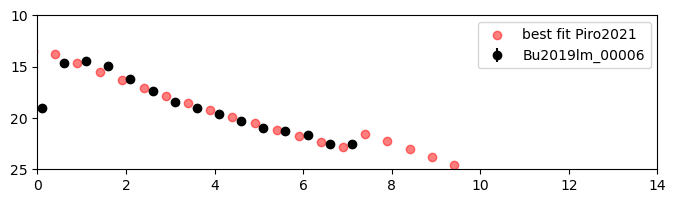

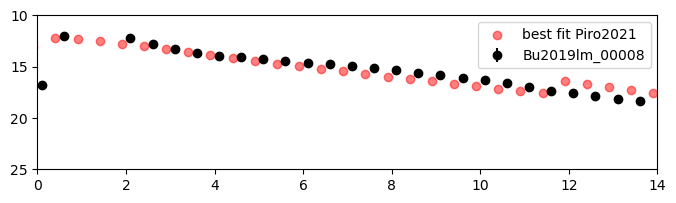

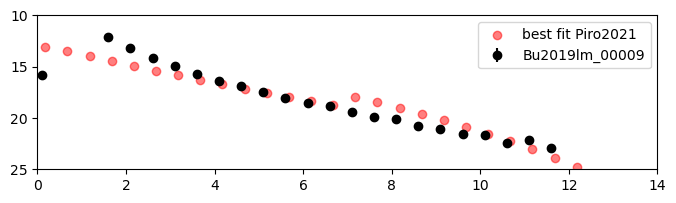

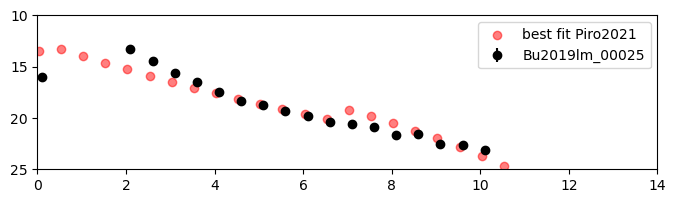

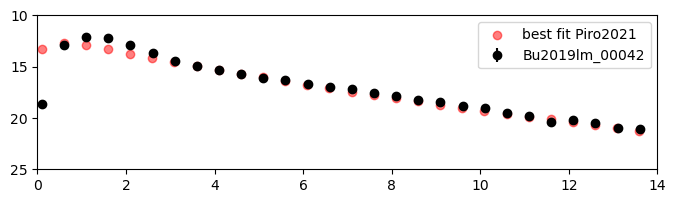

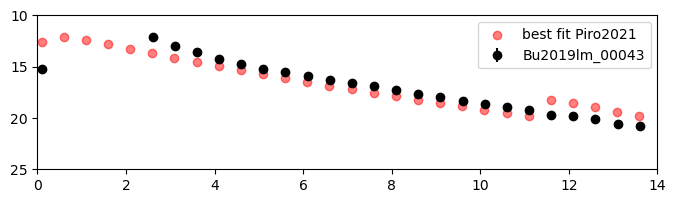

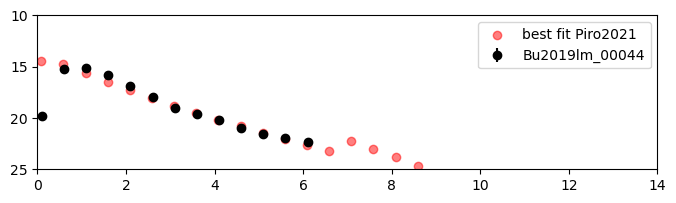

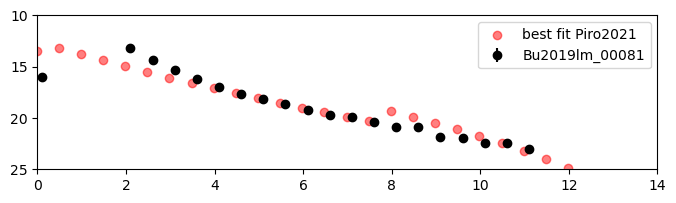

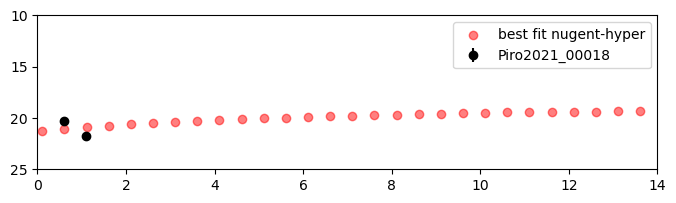

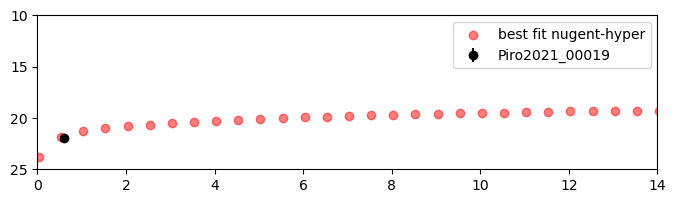

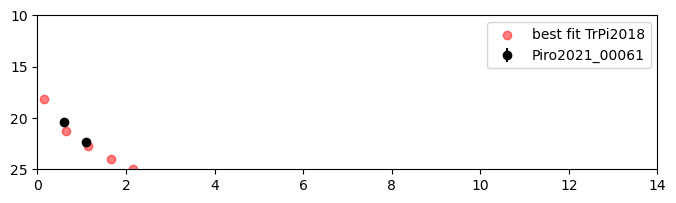

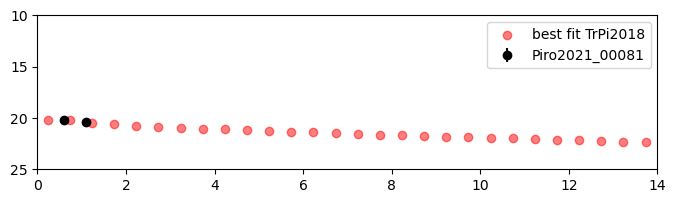

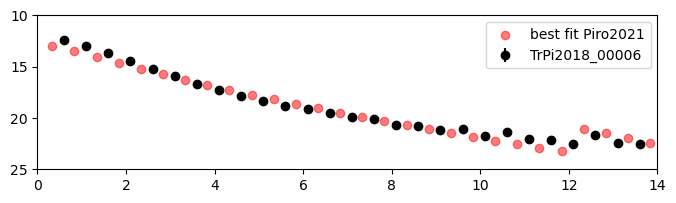

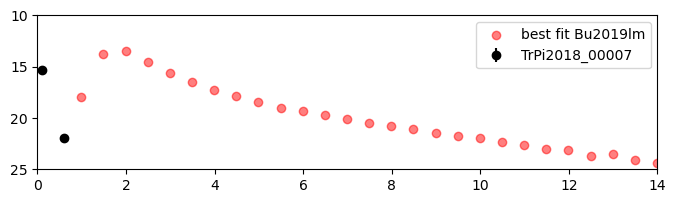

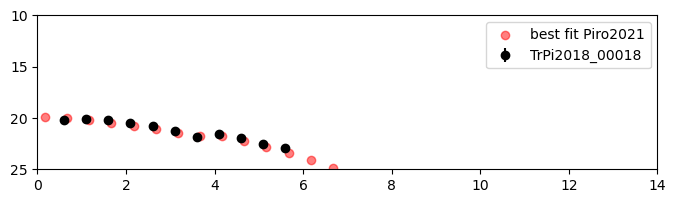

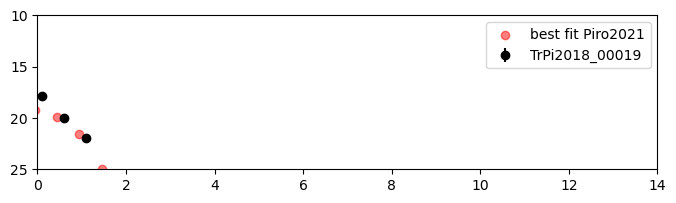

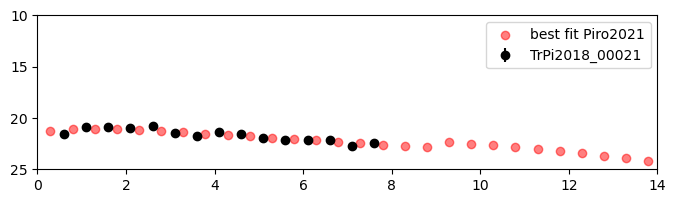

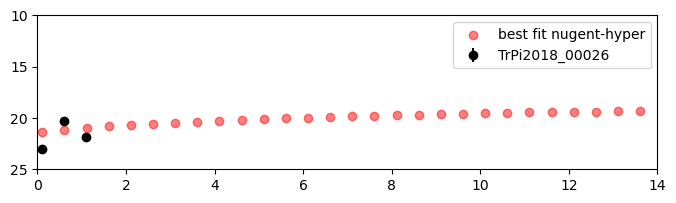

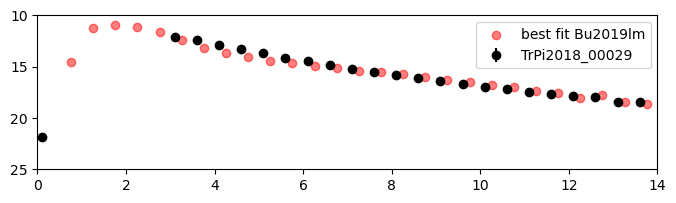

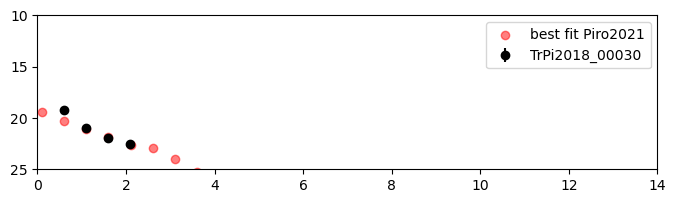

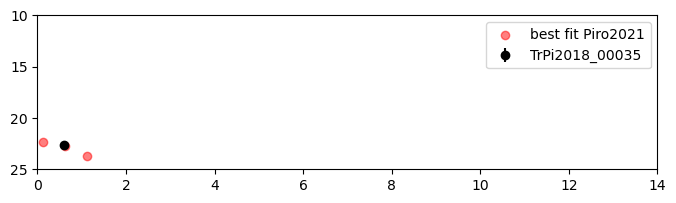

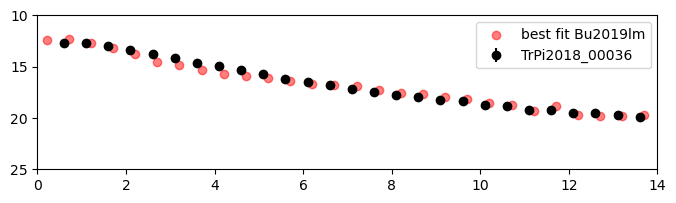

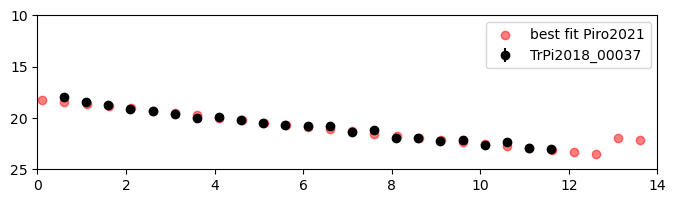

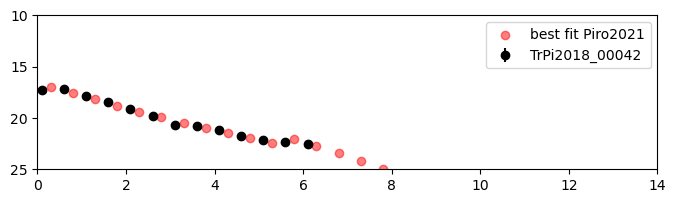

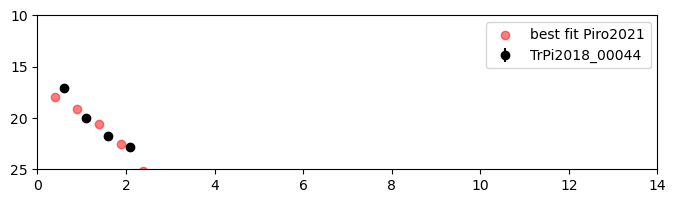

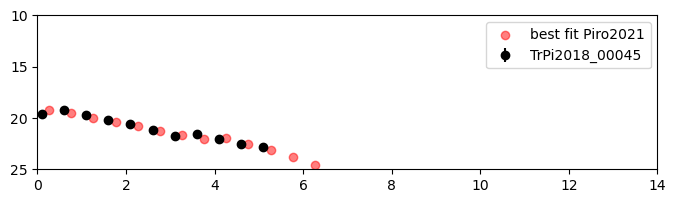

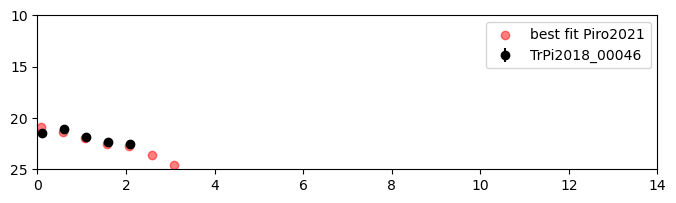

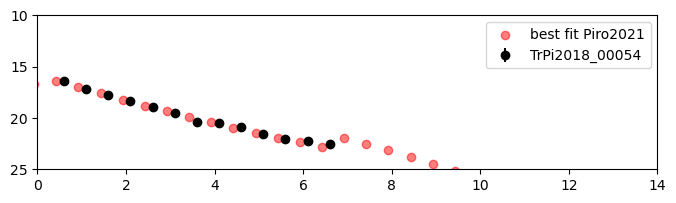

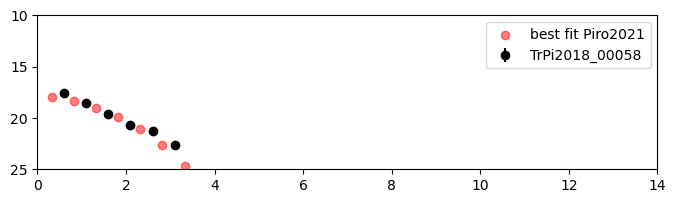

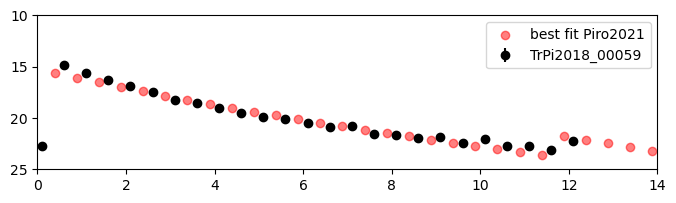

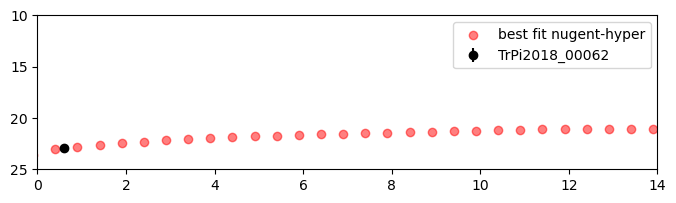

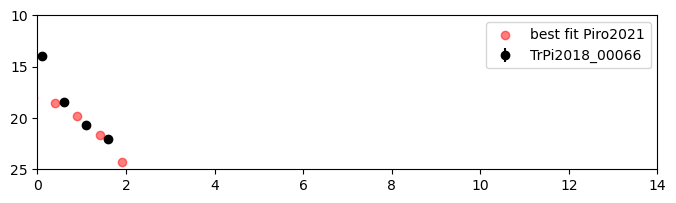

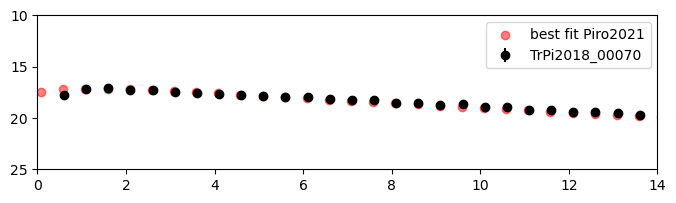

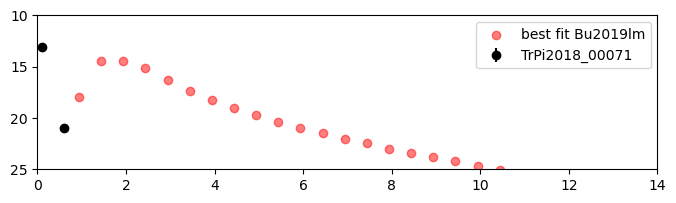

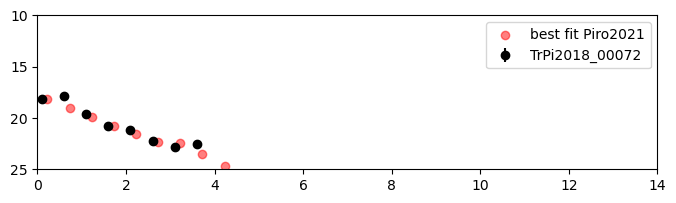

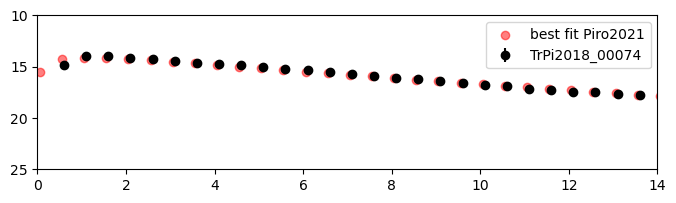

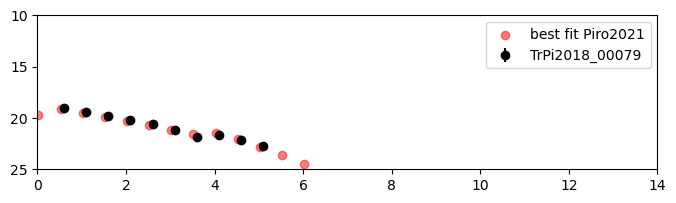

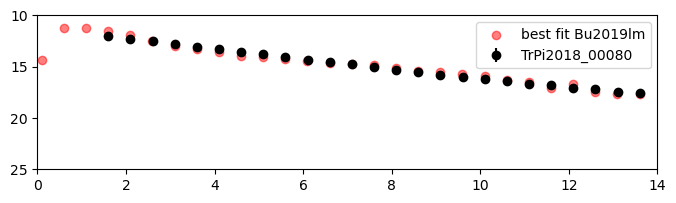

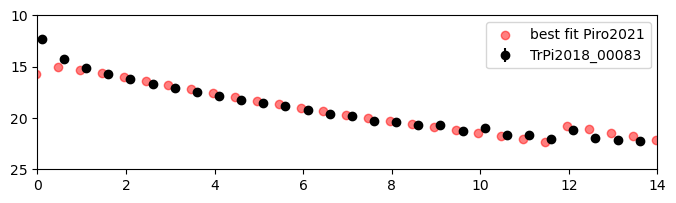

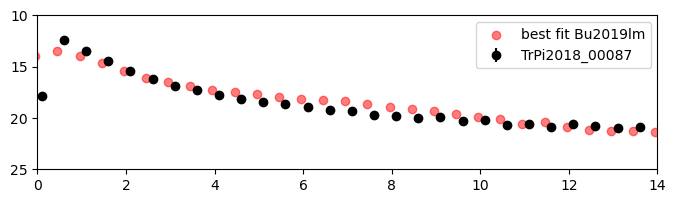

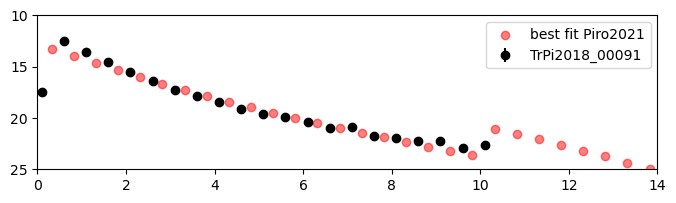

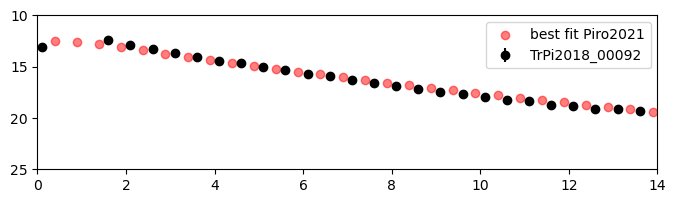

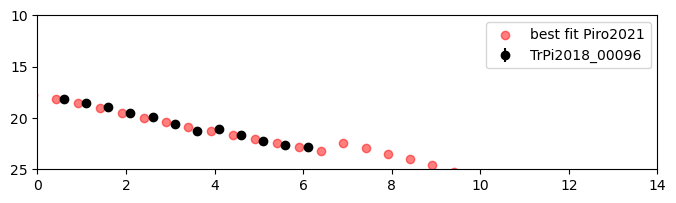

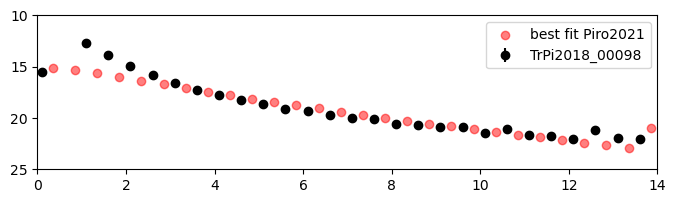

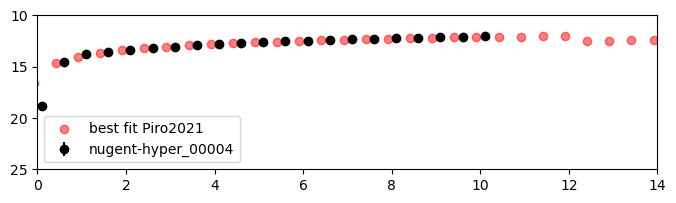

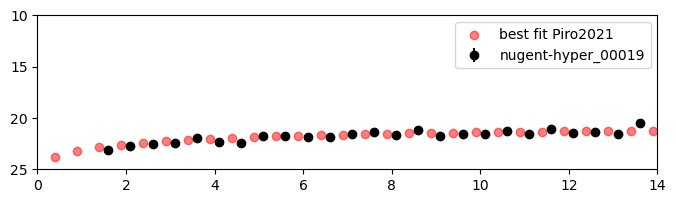

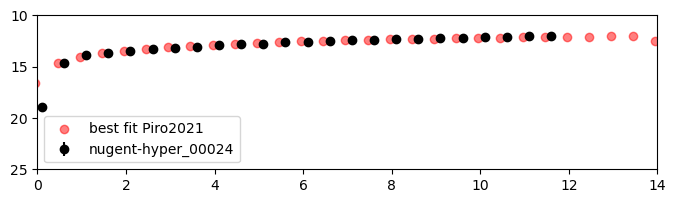

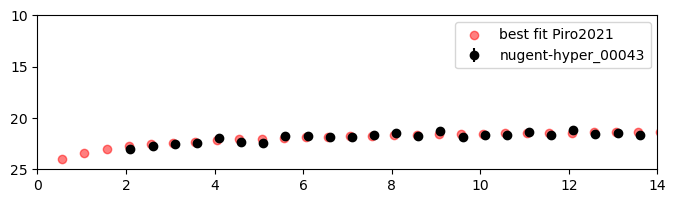

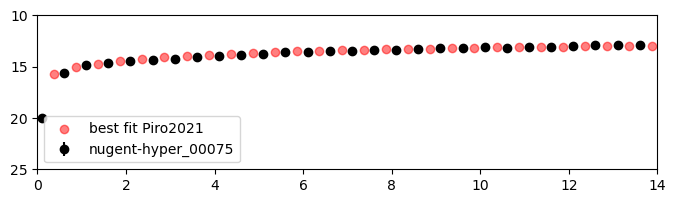

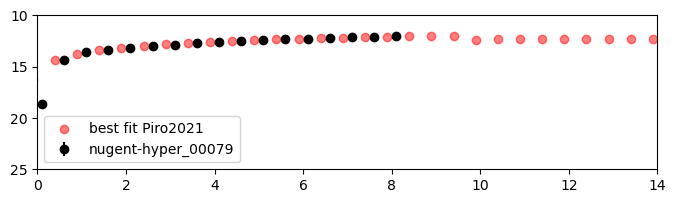

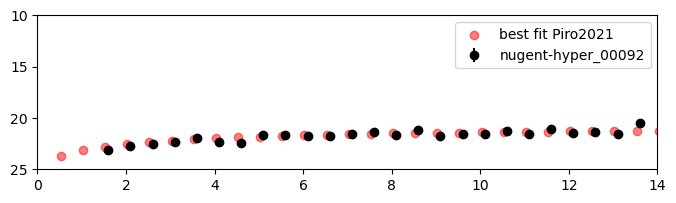

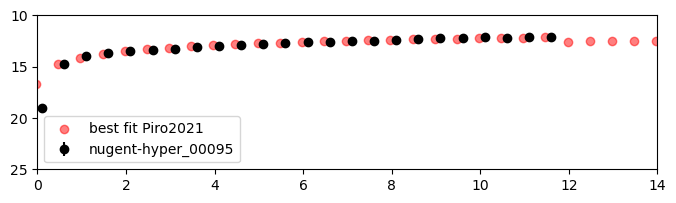

In [92]:
inf = np.inf

print(mm_df2.iloc[0]['true_lightcurve'])
for i in range(0,mm_df2.shape[0]):
## turn mm_df2.iloc[0]['true_lightcurve'] into a dict
    true_lc = eval(mm_df2.iloc[i]['true_lightcurve'])
    best_fit_lc = eval(mm_df2.iloc[i]['best_fit_lightcurve'])

    # print(true_lc)
    # print(best_fit_lc)
    # list(true_lc['ztfg'].values())


    ## use the true_lc and best_fit_lc dicts to plot the lightcurve
    fig, ax = plt.subplots(figsize=(8, 2))
    
    ax.scatter(np.array(list(best_fit_lc['bestfit_sample_times'].values())), list(best_fit_lc['ztfg'].values()), color='red',alpha=0.5, label=f'best fit {mm_df2.iloc[i]["fit_model"]}')
    
    ax.errorbar(list(true_lc['sample_times'].values()), list(true_lc['ztfg'].values()), yerr=list(true_lc['ztfg_err'].values()), fmt='o', color='black', label=f"{mm_df2.iloc[i]['lightcurve']}")
    
    ## find at what index the true lightcurve honly has inf values after (there may be inf values at the start but this should not be the index used)
    ax.legend()
    # tmax_idx = np.where(np.array(list(true_lc['ztfg'].values())) == inf)[0][1]
    # tmax = list(true_lc['sample_times'].values())[tmax_idx]
    
    ax.set_xlim(0, 14)
    ax.set_ylim(25,10)

    
    plt.show()